**Lecture 7. Image Segmentation**  

## 1. Image Segmentation  
- Interesting areas in an image separated into the foeground and background using segmentation  
- 

## 2. Concept of Thresholding  
- Thresholding (binarization)
     - 인기있는 분할 기술로, 물체를 배경으로부터 분리하는데 사용  
     - threshold 초과, 이하로 intensity를 계산함  

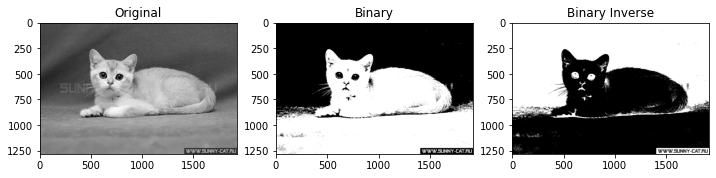

In [24]:
#Program 1 for Thresholding 
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./cat.jpg', 0)

threshold = 120        # threshold
max_val = 255

ret, o1 = cv2.threshold(img, threshold, max_val, cv2.THRESH_BINARY)
ret, o2 = cv2.threshold(img, threshold, max_val, cv2.THRESH_BINARY_INV)

output = [img, o1, o2]

titles = ['Original', 'Binary', 'Binary Inverse']

plt.figure(figsize=(12, 12))

for i in range(3):
        plt.subplot(2, 3, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.title(titles[i])
plt.show()

In [27]:
import cv2
from matplotlib import pyplot as plt 
img = cv2.imread('./dog.jpg') # ndarray로 읽어옴


numpy.ndarray

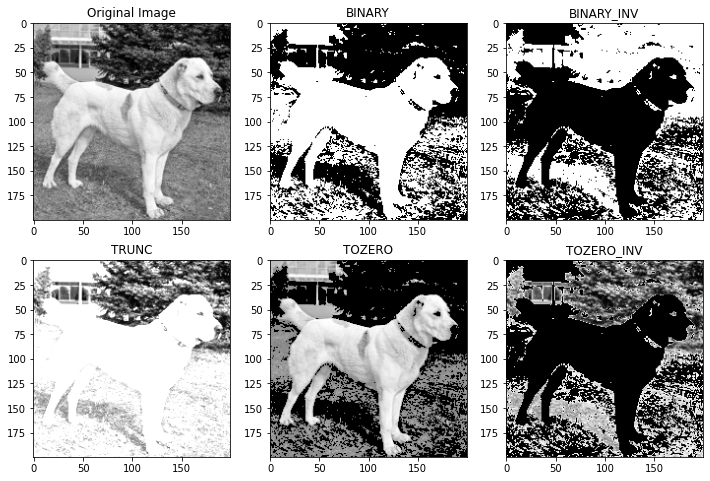

In [33]:
# Program 2 for Thresholding 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./dog.jpg',0)

ret,thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(12, 8))

for i in range(6):
    plt.subplot(2, 3, i+1),plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    #plt.xticks([]),plt.yticks([])

plt.show()


## 3. Adaptive Thresholding  
- 단순 임계값(simple thresholding): global한 임계값 사용, 즉 모든 필셀에 동일한 임계값 적용  
- Adaptive Thresholding  
- `adaptiveThreshold(src, dst, maxValue, daptiveMethod, thresholdType, blockSize, C)`
     - src: input img (source)
     - dst: output img (destination)

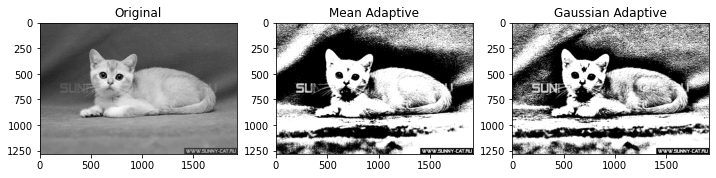

In [37]:
# Program 3 for Thresholding 

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./cat.jpg',0)  
        
block_size = 513
constant = 2
th1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)      # ADAPTIVE_THRESH_MEAN_C: mean output 필터
th2 = cv2.adaptiveThreshold (img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant) # 가우시안 필터
    
output = [img, th1, th2]
    
titles = ['Original', 'Mean Adaptive', 'Gaussian Adaptive']
    
plt.figure(figsize=(12, 12))
for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.title(titles[i])
        #plt.xticks([]); plt.yticks([])
cv2.imwrite('./out.bmp', th1)
# cv2.imwrite('F:/out1.bmp', th2)
plt.show() 

## 4. Otsu's Thresholding  
- `cv.THRESH_OTSU`, `cv.THRESH_BINARY`: Otsu 이미지 프로세싱에 필요한 값
- 주로 grayscale image 및 임계값 위해 사용  
- 임계값보다 크면 흰색(객체), 작거나 같으면 검은색(배경)

In [55]:
print(cv.THRESH_OTSU)

8


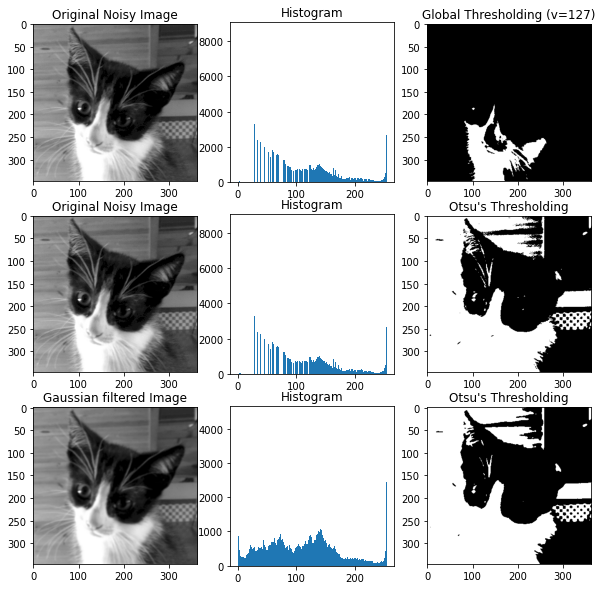

In [53]:
# Program 4 Otsu’s Thresholding with OpenCV
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('./cat-face.png', 0)

# global thresholding
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img, (5,5), 0)     # 가우시안 필터 사용: 이미지를 더 부드럽게 만듦
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(3, 3, i*3+1), plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3])
    plt.subplot(3, 3, i*3+2), plt.hist( images[i*3].ravel(), 256 )
    plt.title(titles[i*3+1])
    plt.subplot(3, 3, i*3+3), plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2])
plt.show()


In [56]:
# Program 5 for Real-time Segmentation

import cv2
  
windowName = ['Binary', 'Binary Inv', 'Zero', 'Zero Inv', 'Trunc']
    
cap = cv2.VideoCapture(0)     # 0: 비디오 켜는 옵션
    
if cap.isOpened():
        ret, frame = cap.read()
else:
        ret = False

while ret:
    
        ret, frame = cap.read()
        
        th = 127
        max_val = 255
    
        ret, o1 = cv2.threshold(frame, th, max_val, cv2.THRESH_BINARY)
        ret, o2 = cv2.threshold(frame, th, max_val, cv2.THRESH_BINARY_INV)
        ret, o3 = cv2.threshold(frame, th, max_val, cv2.THRESH_TOZERO)
        ret, o4 = cv2.threshold(frame, th, max_val, cv2.THRESH_TOZERO_INV)
        ret, o5 = cv2.threshold(frame, th, max_val, cv2.THRESH_TRUNC)
        
        cv2.imshow(windowName[0], o1)
        cv2.imshow(windowName[1], o2)
        cv2.imshow(windowName[2], o3)
        cv2.imshow(windowName[3], o4)
        cv2.imshow(windowName[4], o5)
        if cv2.waitKey(1) == 27:   # ESC
            break

cv2.destroyAllWindows()
cap.release()

: 

마지막 이미지의 히스토그램 다른 이유: 필터를 적용했기 때문 (블러가 적용되는 가우시안 필터)

In [ ]:
# Program 6 Thresholding color images with OpenCV
import cv2
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    plt.subplot(1, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# Create the dimensions of the figure and set title and color:
fig = plt.figure(figsize=(12, 4))
plt.suptitle("Thresholding BGR images", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Load the image and convert it to grayscale:
image = cv2.imread('F:/dog.jpg')

# Plot the image:
show_img_with_matplotlib(image, "image", 1)

# Apply cv2.threshold():
ret1, thresh1 = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)

# Apply cv2.threshold():
(b, g, r) = cv2.split(image)
ret2, thresh2 = cv2.threshold(b, 120, 255, cv2.THRESH_BINARY)
ret3, thresh3 = cv2.threshold(g, 120, 255, cv2.THRESH_BINARY)
ret4, thresh4 = cv2.threshold(r, 120, 255, cv2.THRESH_BINARY)
bgr_thresh = cv2.merge((thresh2, thresh3, thresh4))

# Plot the created images
show_img_with_matplotlib(thresh1, "threshold (120) BGR image", 2)
show_img_with_matplotlib(bgr_thresh, "threshold (120) each channel and merge", 3)

# Show the Figure:
plt.show()

In [ ]:
"""






# # Program 7 for Thresholding 

# import cv2
# import matplotlib.pyplot as plt

# img = cv2.imread('F:/dog.jpg',0) 
    
# # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
# th = 127
# max_val = 255
    
# ret, o1 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY)
# ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV)
# ret, o3 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO)
# ret, o4 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV)
# ret, o5 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC)
    
# output = [img, o1, o2, o3, o4, o5]
    
# titles = ['Original', 'Binary', 'Binary Inv',
#               'Zero', 'Zero Inv', 'Trunc']
# for i in range(6):
#         plt.subplot(2, 3, i+1)
#         plt.imshow(output[i])
#         plt.title(titles[i])
#         plt.xticks([])
#         plt.yticks([])

# plt.show() 


# #Program 8 for Thresholding with Otsu method

# import cv2
# import matplotlib.pyplot as plt

# img = cv2.imread('F:/dog.jpg',0) 
    
# # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
# th = 127
# max_val = 255
    
# ret, o1 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
# ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
# ret, o3 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
# ret, o4 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
# ret, o5 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )
    
# output = [img, o1, o2, o3, o4, o5]
    
# titles = ['Original', 'Binary', 'Binary Inv',
#               'Zero', 'Zero Inv', 'Trunc']
    
# for i in range(6):
#         plt.subplot(2, 3, i+1)
#         plt.imshow(output[i], cmap='gray')
#         plt.title(titles[i])
#         plt.xticks([])
#         plt.yticks([])

# plt.show()



